# 离散和连续随机变量
by Maxwell Margenot

Revisions by Delaney Granizo Mackenzie

Part of the Quantopian Lecture Series:
www.quantopian.com/lectures
github.com/quantopian/research_public

随机变量是根据概率取值的变量。在讨论随机变量时，我们通常用概率分布来描述它们。也就是说，每个值来自随机变量的概率。这方面的经典例子是一个骰子，它能以均匀概率产生值1-6。

我们通常将随机变量分为两类:

* 离散随机变量
* 连续随机变量

如何处理这些问题各不相同，但它们背后的原则是相同的。我们可以很容易地看到，在处理金融问题时，随机变量建模是如何派上用场的;金融资产通常是按照确定性和随机的模式来表示的，随机的模式是用随机变量来表示的。为了做到这一点，我们将在每一步从随机变量中“取样”，然后将金融工具移动那个数量。之所以使用这种分析，是因为资产中的许多变动无法用确定性模型解释。

每个随机变量都遵循一个描述它的函数**概率分布**。概率分布将概率分配给一个随机变量的所有可能值。对于给定的随机变量$X$，我们将$X$等于一个值$X$的概率表示为$P(X = x)$。对于离散随机变量，我们可以简写成$p(x) = p(X = x)$。这也被称为**概率质量函数** (PMF)。对于连续随机变量，我们不能使用PMF，因为我们将在后面讨论，所以我们必须使用**概率密度函数** (PDF)。概率分布是Black-Scholes和二项式定价模型以及CAPM的基础。为了进行蒙特卡罗模拟，对它们的理解也是必要的。

对于每个概率分布函数，我们还有一个**累积分布函数** (CDF)。这被定义为$P(X \leq x)$，即随机变量小于或等于某个特定值的概率。CDF的简写是$F(x) = P(X \leq x)$。为了在离散情况下找到$F(x)$，我们对所有小于或等于$x$的结果的PMF值求和。在连续的情况下，我们使用微积分对所有值(最高为$x$)的PDF进行集成。

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools

## 离散随机变量
离散随机变量是具有可计数结果的变量。每一个结果都有一个单独的概率。考虑抛硬币或掷骰子，一些最基本的均匀分布随机变量。对于抛硬币，有两种可能的结果，正面或反面，每一个发生的概率是1/2美元。离散随机变量并不总是对所有结果具有相同的权重。离散随机变量的基本单位是它的**概率质量函数** (PMF)，概率函数$p(x)$的另一种叫法。PMF，或者说概率函数，给出了概率分布域中每个点的质量。概率函数有两个主要性质:

1. $0 \leq p(x) \leq 1$，因为所有的概率都在$[0,1]$区间内
2. 所有单个x的值的概率$p(x)$的和等于$1$。随机变量的所有值的总权重必须加到$1$。

这里我们将考虑一些最常见的离散概率分布的例子。

In [5]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.randint(self.low, self.high, numberOfSamples)
        return samples

### 均匀分布
概率分布最基本的类型是均匀分布。在离散的均匀分布中，所有结果的权重相等。以掷骰子为例。它有6个面，从$1$到$6$，每个面的概率都是$1/6$。有了这个，我们知道对于我们的均匀随机变量$X$的所有值，其PMF必须是$p(x) = 1/6$。

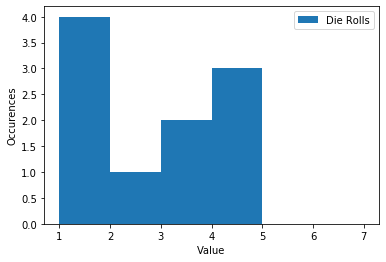

In [10]:
DieRolls = DiscreteRandomVariable(1, 6)
plt.hist(DieRolls.draw(10), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

每次我们掷骰子，我们都有相同的机会得到每个面。在短期内，这看起来是不均匀的，但如果我们采取许多样本，很明显，每个面发生相同的百分比卷。

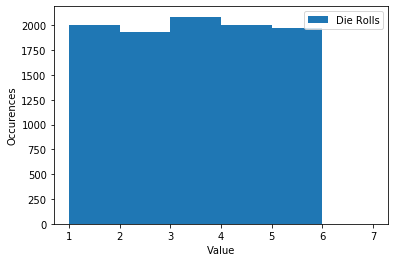

In [11]:
plt.hist(DieRolls.draw(10000), bins = [1,2,3,4,5,6,7], align = 'mid')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

对于掷骰，我们可以很容易地看到，对于随机变量x的所有值，$p(x) = 1/6$。让我们看看概率函数和累积分布函数的所有值的可能性:

Value: $X = x$ | PMF: $p(x) = P(X = x)$ | CDF: $F(x) = P(X \leq x)$ |
--- | --- | --- | 
1 | $1/6$ | $1/6$
2 | $1/6$ | $1/3$
3 | $1/6$ | $1/2$
4 | $1/6$ | $2/3$
5 | $1/6$ | $5/6$
6 | $1/6$ | $1$

利用这个表，我们可以很容易地看出概率函数满足必要条件。概率函数的每个值在区间$[0,1]$内，满足第一个条件。第二个条件是满足的，因为$p(x)$ 所有值之和等于$1$，这一点在累积分布函数中得到了证明。说明了累积分布函数的两个性质:

1. 对于所有的$x$， CDF在$0$和$1$之间。它与概率分布函数的值平行。
2. CDF在$x$中递增。这意味着当$x$增加时，CDF要么增加，要么保持不变。

当我们尝试对其它概率分布进行抽样时，我们可以利用具有某些函数的均匀分布的复合来得到适当的样本。然而，这种方法可能非常低效。因此，我们将为每个发行版使用内置的NumPy函数来简化问题。

### 二项分布
二项分布是用来描述成功和失败的。这在投资环境中非常有用，因为我们的许多选择都是这样的二元选择。当我们进行一次成功/失败的试验时，我们称之为伯努利试验。对于伯努利随机变量，我们有两种可能的结果:

$$p(1) = P(Y = 1) = p \ \ \ \ \ \ \
p(0) = P(Y = 0) = 1-p$$

我们认为$Y$取$1$代表是成功的，所以在一次试验中成功发生的概率是$p$。

二项分布是一组$n$次的伯努利试验。因此，我们可以获得介于$0$到$n$之间的成功次数。每个试验都有相同的成功概率，$p$，所有的试验都是相互独立的。我们可以只用$n$和$p$来描述整个二项随机变量，用$X$ **~** $B(n, p)$表示。这说明$X$是一个参数为$n$和$p$的二项随机变量。

为了定义二项随机变量的概率函数，我们必须能够从总试验次数中选择若干次成功。这种思想很容易适用于组合学中的组合思想。组合描述了从集合中选择项的所有可能方法，以便顺序不重要。例如，如果我们有$6$双袜子，我们想从中选择$2$双，我们可以将可能的组合总数写成$\binom{6}{2}$。这个扩展为:

$$
\binom{6}{2} = \frac{6!}{4! \ 2!} = 15
$$

其中$!$表示阶乘，$n! = (n)(n-1)(n-2)\ldots (1)$。为了更一般地写出一个组合的公式，我们写:

$$
\binom{n}{x} = \frac{n!}{(n-x)! \ x!}
$$

我们使用这个符号是为了用二项式随机变量来选择是否成功。这个组合的目的是计算有多少种不同的方法可以得到相同的结果。得到的概率函数为:

$$
p(x) = P(X = x) = \binom{n}{x}p^x(1-p)^{n-x} = \frac{n!}{(n-x)! \ x!} p^x(1-p)^{n-x}
$$

如果$X$是一个分布有$B(n, p)$的二项随机变量。

In [12]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, numberOfTrials = 10, probabilityOfSuccess = 0.5):
        self.variableType = "Binomial"
        self.numberOfTrials = numberOfTrials
        self.probabilityOfSuccess = probabilityOfSuccess
        return
    def draw(self, numberOfSamples):
        samples = np.random.binomial(self.numberOfTrials, self.probabilityOfSuccess, numberOfSamples)
        return samples

以股价上下波动为例，每一种波动的概率为$p = 0.5$。我们可以把上涨或$U$看作是成功，下跌或$D$看作是失败。这样，我们就可以用一个二项随机变量来分析每个事件的概率。我们还将考虑一个$n$值为$5$的股票价格随时间的$5$次观察值。下表为各事件发生的概率:

Number of Up moves, $x$ | Ways of reaching $x$ Up moves $\binom{n}{x}$ | Independent Trials with $p = 0.50$ | $p(x)$ Value | CDF: $F(x) = P(X \leq x)$ |
--- | --- | --- | --- | --- | 
$0$ | $1$ | $0.50^0 (1 - 0.50)^5 = 0.03125$ | $0.03125$ | $0.03125$
$1$ | $5$ | $0.50^1 (1 - 0.50)^4 = 0.03125$ | $0.15635$ | $0.18750$
$2$ | $10$ | $0.50^2 (1 - 0.50)^3 = 0.03125$ | $0.31250$ | $0.50000$
$3$ | $10$ | $0.50^3 (1 - 0.50)^2 = 0.03125$ | $0.31250$ | $0.81250$
$4$ | $5$ | $0.50^4 (1 - 0.50)^1 = 0.03125$ | $0.15635$ | $0.96875$
$5$ | $1$ | $0.50^5 (1 - 0.50)^0 = 0.03125$ | $0.03125$ | $1.00000$

这里我们看到，在$p = 0.50$的特殊情况下，二项分布是对称的。因为向上和向下移动的概率相等，概率之间唯一的区别因素就是概率函数的组合方面，它本身是对称的。如果我们稍微修改一下$p$的值，我们将得到一个不对称的分布。

下面我们对以上参数进行抽样，其中$X$ **~** $B(5, 0.50)$:

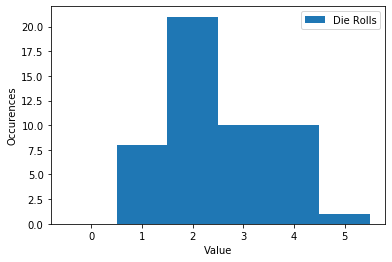

In [13]:
StockProbabilities = BinomialRandomVariable(5, 0.50)
plt.hist(StockProbabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.legend(['Die Rolls']);

同样，在所有的抽样情况下，你取的样本越多，你得到的分布就越一致:

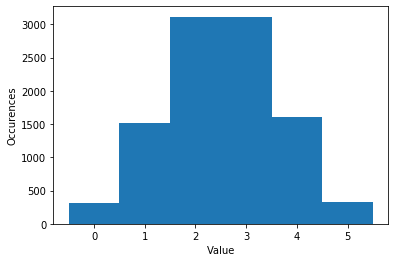

In [14]:
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

假设我们改变了参数使$p = 0。25$。这使得$P(X = 0) = 0.23730$，使我们的分布更倾向于更低的值。从下图中我们可以很容易地看出:

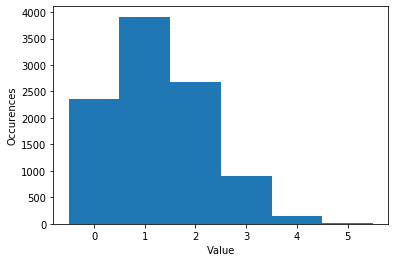

In [15]:
StockProbabilities = BinomialRandomVariable(5, 0.25)
plt.hist(StockProbabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences');

将$p$的值从$0.50$改为$0.25$显然使我们的分布不对称。我们可以将股价随二项随机变量变动的概念扩展到一个我们称之为股价变动二项模型的框架中。这是期权定价的基础之一。在二项模型中，假设在任意给定的时间段内，股票价格可以根据涨跌概率决定的值上下波动。这将股票价格变成了一个关于向上或向下移动的幅度，以及初始股票价格的二项式随机变量的函数。我们可以改变这些参数来近似不同的股票价格分布。

## 连续随机变量
连续随机变量不同于离散随机变量，连续随机变量可以取无穷多个结果。它们不能被计数或描述为一个列表。因此，当我们把个体概率分配给结果时，它的意义非常小。因为有无穷多的结果，击中任何一个结果的概率都是0。

我们可以通过计算结果范围内的概率来解决这个问题。这是用微积分来处理的，尽管为了使用我们的抽样技术我们实际上不需要使用任何。对于连续随机变量$P(X = 0)$是没有意义的。相反，我们应该寻找更像$P(-1 < X < 1)$的值。对于连续随机变量，我们没有使用PMF，而是定义了一个**概率密度函数** (PDF)， $f_X(x)$，这样我们可以说:
$$P(a < X < b) = \int_a^b f_X(x)dx$$

类似于我们对离散分布的要求，即所有概率加到$1$，这里我们要求:

1. $f_X(x) \geq 0$ 对于$X$所有的值
2. $P(-\infty < X < \infty) = \int_{-\infty}^{\infty} f_X(x) dx = 1$

值得注意的是，因为在一个连续分布的单个点上的概率是$0$，所以在一个范围的端点上的概率是$0$。因此，$P(a \leq X \leq b) = P(a < X \leq b) = P(a \leq X < b) = P(a < X < b)$。如果我们在所有可能的范围内对PDF进行积分，那么值应该是$1$。

In [16]:
class ContinuousRandomVariable:
    def __init__(self, a = 0, b = 1):
        self.variableType = ""
        self.low = a
        self.high = b
        return
    def draw(self, numberOfSamples):
        samples = np.random.uniform(self.low, self.high, numberOfSamples)
        return samples


### 均匀分布
均匀分布也可以在连续随机变量的框架内定义。我们把$a$和$b$设为常数，其中$b$是可能的最高值，$a$是结果可能获得的最低值。则均匀随机变量的PDF为:

$$f(x) = \begin{cases}\frac{1}{b - a} & \text{for $a < x < b$} \ 0 & \text{otherwise}\end{cases}$$

因为这个函数是在一个连续的区间上定义的，所以PDF包含了$a$和$b$之间的所有值。这里我们有一个PDF图(可以随意改变$a$和$b$的值):

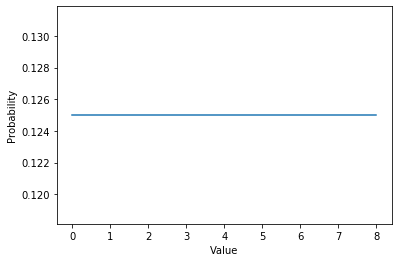

In [17]:
a = 0.0
b = 8.0
x = np.linspace(a, b, 100)
y = [1/(b-a) for i in x]
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

与前面的离散均匀情况一样，对于变量可以取的所有值，连续均匀分布PDF都是常数。唯一的区别是我们不能取任意点的概率。我们积分PDF得到的CDF是:

$$ F(x) = \begin{cases} 0 & \text{for $x \leq a$} \ \frac{x - a}{b - a} & \text{for $a < x < b$} \ 1 & \text{for $x \geq b$}\end{cases}$$

与PDF的绘制间隔相同:

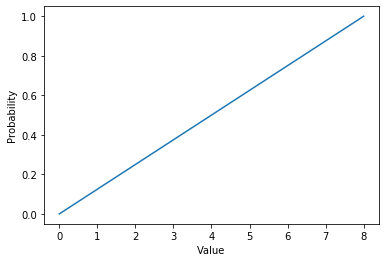

In [18]:
y = [(i - a)/(b - a) for i in x]
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability');

### 正态分布
正态分布是统计学中一个非常普遍和重要的分布。统计学中的许多重要检验和方法，乃至金融学中的许多重要检验和方法，都是建立在常态假设的基础上的。这在很大程度上是由于中心极限定理(CLT)的结果，它表明足够大的独立试验样本是正态分布的。正态分布的便利也体现在某些算法交易策略中。例如，在[pair trading](https://www.quantopian.com/lectures/介绍所涉及的对配对交易)课程中，我们可以搜索协整的股票对，并根据正态分布预测它们之间的价差变化方向。

In [19]:
class NormalRandomVariable(ContinuousRandomVariable):
    def __init__(self, mean = 0, variance = 1):
        ContinuousRandomVariable.__init__(self)
        self.variableType = "Normal"
        self.mean = mean
        self.standardDeviation = np.sqrt(variance)
        return
    def draw(self, numberOfSamples):
        samples = np.random.normal(self.mean, self.standardDeviation, numberOfSamples)
        return samples

当描述一个正态随机变量时，我们只需要知道它的均值($\mu$)和方差($\sigma^2$，其中$\sigma$是标准差)。我们用$X$ **~** $N(\mu， \sigma^2)$表示一个随机变量$X$为正态随机变量。在现代投资组合理论中，股票收益通常被假定为服从正态分布。正态随机变量的一个主要特征是两个或两个以上正态随机变量的线性组合是另一个正态随机变量。这对于考虑多支股票投资组合的平均回报和方差是有用的。到目前为止，我们只考虑了单变量或单变量的概率分布。当我们想一次描述随机变量时，就像观察多支股票那样，我们可以观察一个多元分布。多元正态分布完全是通过每个变量、它们的方差以及每一对变量之间的明显相关性来描述的。在确定投资组合的特征时，这一点很重要，因为整个投资组合的方差既取决于其证券的方差，也取决于它们之间的相关性。

正态随机变量的PDF为:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

并定义为$-\infty < x < \infty$。当$\mu = 0$和$\sigma = 1$时，我们称之为标准正态分布。

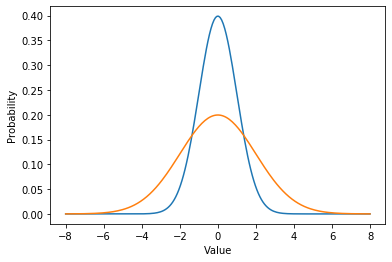

In [20]:
mu_1 = 0
mu_2 = 0
sigma_1 = 1
sigma_2 = 2
x = np.linspace(-8, 8, 200)
y = (1/(sigma_1 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_1)*(x - mu_1) / (2 * sigma_1 * sigma_1))
z = (1/(sigma_2 * np.sqrt(2 * 3.14159))) * np.exp(-(x - mu_2)*(x - mu_2) / (2 * sigma_2 * sigma_2))
plt.plot(x, y, x, z)
plt.xlabel('Value')
plt.ylabel('Probability');

通过改变正态分布的均值和标准差，我们可以改变钟形曲线的深度和宽度。随着标准差的增大，分布值在均值附近的集中程度减小。

我们不是用正态分布来模拟股票价格，而是用它来模拟回报。股票价格不能低于$0$，而正态分布可以取实线上的所有值，使其更适合于回报。根据正态分布的均值和方差，我们可以得出以下结论:

* 大约$68\%$的观测值落在均值周围的一个标准差内($\mu \pm \sigma$)
* 大约$95\%$的观测值落在均值周围的两个标准差内($\mu \pm 2\sigma$)
* 大约$99\%$的观测值落在均值周围的三个标准差内($\mu \pm 3\sigma$)

这些值对于理解置信区间很重要，因为它们与正态分布相关。当考虑样本分布的均值和方差时，我们喜欢观察均值周围的不同置信区间。

利用中心极限定理，我们可以标准化不同的随机变量，使它们成为正态随机变量。统计中一个非常常见的工具是标准正态概率表，用于查找给定值为$x$的标准正态CDF的值。通过将随机变量转换为标准正态，我们可以简单地检查这些表中的概率值。我们标准化一个随机变量$X$，用它减去均值然后除以方差，得到标准正态随机变量$Z$。

$$
Z = \frac{X - \mu}{\sigma}
$$

我们来看看$X$ **~** $B(n, p)$是一个二项随机变量的情况。对于二项随机变量，均值为$\mu = np$，方差为$\sigma^2 = np(1 - p)$。

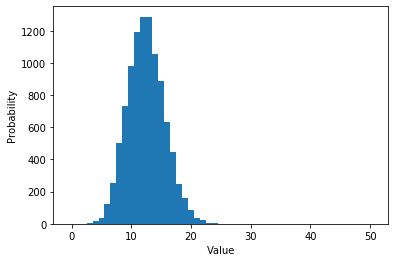

In [21]:
n = 50
p = 0.25
X = BinomialRandomVariable(n, p)
X_samples = X.draw(10000)
Z_samples = (X_samples - n * p) / np.sqrt(n * p * (1 - p))

plt.hist(X_samples, bins = range(0, n + 2), align = 'left')
plt.xlabel('Value')
plt.ylabel('Probability');

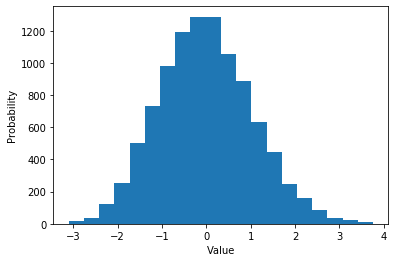

In [22]:
plt.hist(Z_samples, bins=20)
plt.xlabel('Value')
plt.ylabel('Probability');

我们可以标准化随机变量的想法是非常重要的。通过把随机变量变成我们更熟悉的分布，标准正态分布，我们可以很容易地回答任何关于原始变量的概率问题。然而，这取决于是否有足够大的样本量。

假设股票收益是正态分布的。假设$Y$是股票的价格。我们将模拟它的回报率并绘制它.

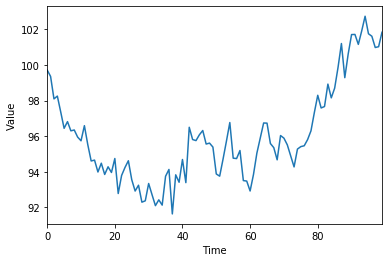

In [23]:
Y_initial = 100
X = NormalRandomVariable(0, 1)
Y_returns = X.draw(100) # generate 100 daily returns
Y = pd.Series(np.cumsum(Y_returns), name = 'Y') + Y_initial
Y.plot()
plt.xlabel('Time')
plt.ylabel('Value');

假设我们有一些其他的股票，$Z$，我们有一个$Y$和$Z$的投资组合，叫做$W$。

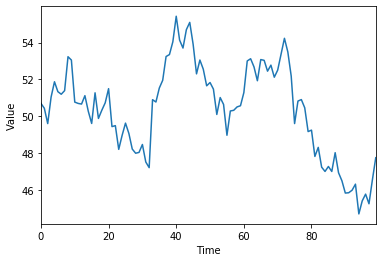

In [24]:
Z_initial = 50
Z_returns = X.draw(100)
Z = pd.Series(np.cumsum(Z_returns), name = 'Z') + Z_initial
Z.plot()
plt.xlabel('Time')
plt.ylabel('Value');

我们通过对$Y$和$Z$的数量取加权平均值来构建$W$。

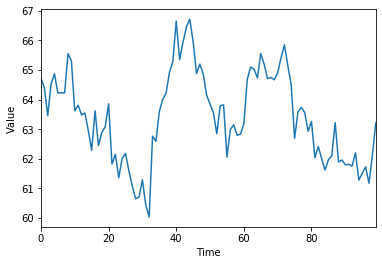

In [25]:
Y_quantity = 20
Z_quantity = 50
Y_weight = Y_quantity/(Y_quantity + Z_quantity)
Z_weight = 1 - Y_weight

W_initial = Y_weight * Y_initial + Z_weight * Z_initial
W_returns = Y_weight * Y_returns + Z_weight * Z_returns
W = pd.Series(np.cumsum(W_returns), name = 'Portfolio') + W_initial
W.plot()
plt.xlabel('Time')
plt.ylabel('Value');

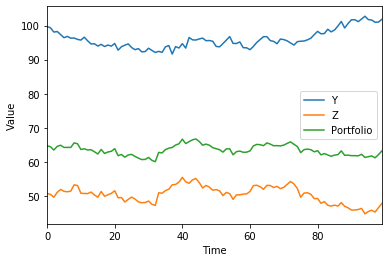

In [26]:
pd.concat([Y, Z, W], axis = 1).plot()
plt.xlabel('Time')
plt.ylabel('Value');

注意我们投资组合的收益，$W$，也是正态分布的

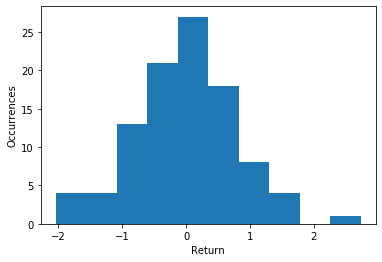

In [27]:
plt.hist(W_returns);
plt.xlabel('Return')
plt.ylabel('Occurrences');

正态分布在金融中得到了广泛的应用，尤其是在风险和投资组合理论中。可以找到广泛的文献利用正态分布的目的从风险分析到股票价格建模。

## 拟合一个分布
现在我们将尝试将一个概率分布与股票的回报相匹配。我们会考虑特斯拉的回报，并试图使其符合正态分布。首先要检查的是返回值是否具有正态分布的性质。为此，我们将使用Jarque-Bera测试，如果p值低于临界值，则表明不是正态。

In [28]:
from pandas_datareader import data
start = '2015-01-01'
end = '2016-01-01'
prices = data.get_data_yahoo('TSLA',start,end)['Close']
returns = prices.pct_change()[1:]

The JB test p-value is:  1.995629766039672e-12
We reject the hypothesis that the data are normally distributed  True
The skewness of the returns is:  0.21099589280181114
The kurtosis of the returns is:  5.225615242529215


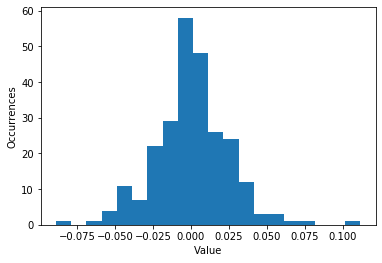

In [30]:
# Take the daily returns
returns = prices.pct_change()[1:]

#Set a cutoff
cutoff = 0.01

# Get the p-value of the JB test
_, p_value, skewness, kurtosis = stattools.jarque_bera(returns)
print("The JB test p-value is: ", p_value) 
print ("We reject the hypothesis that the data are normally distributed ", p_value < cutoff)
print ("The skewness of the returns is: ", skewness)
print ("The kurtosis of the returns is: ", kurtosis)
plt.hist(returns, bins = 20)
plt.xlabel('Value')
plt.ylabel('Occurrences');

JB检验的低p值导致我们*拒绝*了收益正态分布的原假设。这是由于峰度很高(正态分布的峰度为$3$)。

我们将从这里开始假设回报是正态分布这样我们就能完成拟合分布的步骤。然后计算样本均值和标准差。

In [32]:
# Take the sample mean and standard deviation of the returns
sample_mean = np.mean(returns)
sample_std_dev = np.std(returns)

现在让我们看看理论的正态曲线是如何与实际值相匹配的。

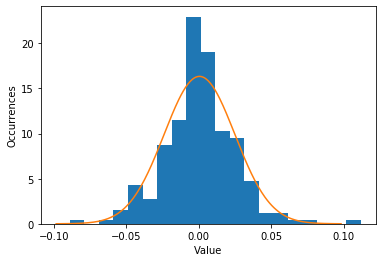

In [34]:
x = np.linspace(-(sample_mean + 4 * sample_std_dev), (sample_mean + 4 * sample_std_dev), len(returns))
sample_distribution = ((1/np.sqrt(sample_std_dev * sample_std_dev * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std_dev * sample_std_dev)))
plt.hist(returns, bins = 20, density = True);
plt.plot(x, sample_distribution)
plt.xlabel('Value')
plt.ylabel('Occurrences');

我们的理论收益率曲线的峰值大大低于实际值，这是有道理的，因为收益率实际上并不是正态分布的。这也是由于正态分布的峰度。收益的峰度值约为$5.20$，而正态分布的峰度值为$3$。峰度越高，峰顶越高。建立价格和回报模型之所以如此困难，一个主要原因是潜在的概率分布。很多金融理论和框架都要求数据以某种方式与正态分布相关。这是正态分布如此普遍的一个主要原因。例如，布莱克-斯科尔斯期权定价模型的基础假设股票价格是对数正态分布。然而，要找到符合正常假设的真实数据是极其困难的。在实际实现一个策略时，您不应该假设数据遵循一个分布，除非有很好的理由。

通常，当我们试图将一个概率分布与真实世界的值相匹配时，我们应该考虑一个特定的分布(或多个分布)。对于不同的发行版有各种各样的测试，我们可以应用这些测试来查看什么是最合适的。此外，随着更多的信息变得可用，将有必要更新样本均值和标准差，甚至可能找到一个不同的分布，以更准确地反映新的信息。分布的形状也会随之改变。